In [1]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [2]:
import pandas as pd
 
tb_new = pd.read_csv('/content/drive/My Drive/tb_new.csv')# Dataset is now stored in a Pandas Dataframe

print(tb_new.columns)

Index(['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp'], dtype='object')


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
tb_new["timestamp"]= pd.to_datetime(tb_new["timestamp"]) 

In [0]:
tb_new['timestamp'] = tb_new['timestamp'].dt.strftime('%d/%m/%Y')

In [0]:
tb_new.sort_values(by=['timestamp'], inplace=True, ascending=True)

In [0]:
tb_new.head()


,user_id,item_id,category_id,behavior_type,timestamp
1928411,170980,1500112,4145813,pv,01/01/1970
87527314,419355,418492,5053508,pv,01/01/1970
87527315,419355,2466766,1879194,pv,01/01/1970
87527316,419355,1902794,1879194,pv,01/01/1970
87527317,419355,3109278,1879194,pv,01/01/1970


In [0]:
tb_new.tail()

,user_id,item_id,category_id,behavior_type,timestamp
99801884,98390,1187404,2920476,pv,31/12/2017
99801883,98390,2433216,149192,pv,31/12/2017
99801882,98390,4412076,149192,pv,31/12/2017
99801861,98390,1609929,2920476,pv,31/12/2017
99801820,98390,4935505,982926,pv,31/12/2017


I noticed there are invalid dates in the timestamp column e.g. 01/01/1970. I only save valid dates within time period 01/12/2017 to 03/12/2017 for analysis.

In [0]:
tb_new = tb_new[(tb_new['timestamp'] =='01/12/2017') | (tb_new['timestamp'] =='02/12/2017') | (tb_new['timestamp'] =='03/12/2017')]

In [0]:
tb_new.shape

(37073453, 5)

In [0]:
tb_new.sort_values(by=['user_id'], inplace=True, ascending=True)

In [15]:
tb_new['user_id'].min()

1

In [16]:
tb_new['user_id'].max()

1018011

In [0]:
# I will take a sample based on user IDs, from my data for analysis and modelling.
tb_new = tb_new[tb_new['user_id']<5000]

In [25]:
tb_new.shape

(180707, 5)

In [26]:
tb_new.head()

,user_id,item_id,category_id,behavior_type,timestamp
47,1,3219016,3002561,pv,02/12/2017
50,1,4954999,411153,pv,03/12/2017
51,1,818610,411153,pv,03/12/2017
53,1,568695,1320293,pv,03/12/2017
48,1,2278603,3002561,pv,02/12/2017


In [0]:
tb_new.to_csv('/content/drive/My Drive/tb_final.csv', index=False)
#saved as separate csv for further work on recommender system in a separate notebook.

pv      161338
cart     10900
fav       5183
buy       3286
Name: behavior_type, dtype: int64


Text(0.5, 1.0, 'User Action')

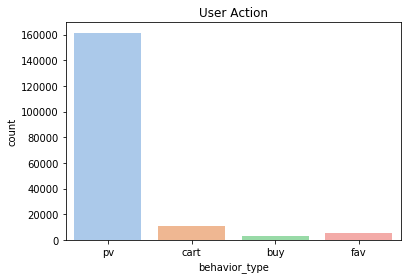

In [29]:
# Bar plot to see the count of each behaviour type.
print(tb_new['behavior_type'].value_counts())
sns.countplot(x= 'behavior_type', data=tb_new, palette="pastel")
plt.title('User Action')

There is a significantly larger amount of page views than all the other behavior types.

In [0]:
#Group item_id by its user behavior
grouped_behavior = tb_new.groupby('behavior_type')['item_id'].apply(list)
#grouped_behavior

In [0]:
#See the most viewed items
page_views = grouped_behavior['pv']

#convert page_views to numpy array
page_views = np.array(page_views[:])

#counting uniques values of page views
unique, counts = np.unique(page_views, return_counts=True)

# Dictionary with key as unique and value as counts
count_views = {}
count_views = dict(zip(unique, counts))



Text(0, 0.5, 'View Count')

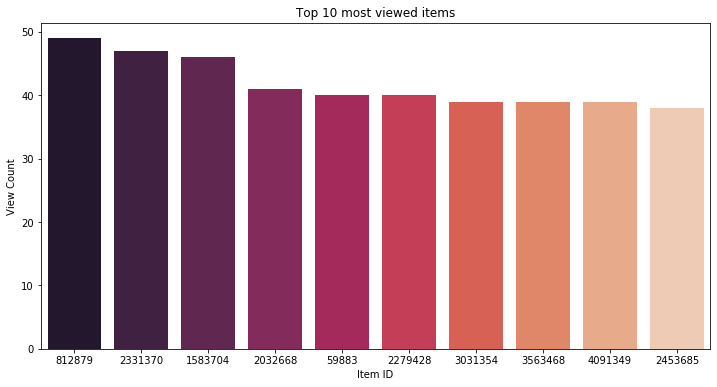

In [32]:
#sorting the dictionary
import operator
sort_views = sorted(count_views.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x = [i[0] for i in sort_views[:10]]

# y-axis: count of views
y = [i[1] for i in sort_views[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x, y, order=x, palette="rocket")
plt.title("Top 10 most viewed items")
plt.xlabel("Item ID")
plt.ylabel("View Count")

In [0]:
#See the most add to cart items
add_cart = grouped_behavior['cart']

#convert add cart to numpy array
add_cart = np.array(add_cart[:])

#counting uniques values of add to cart
cart_unique, cart_counts = np.unique(add_cart, return_counts=True)

# Dictionary with key as unique and value as counts
count_add_cart = {}
count_add_cart = dict(zip(cart_unique, cart_counts))

Text(0, 0.5, 'Cart Count')

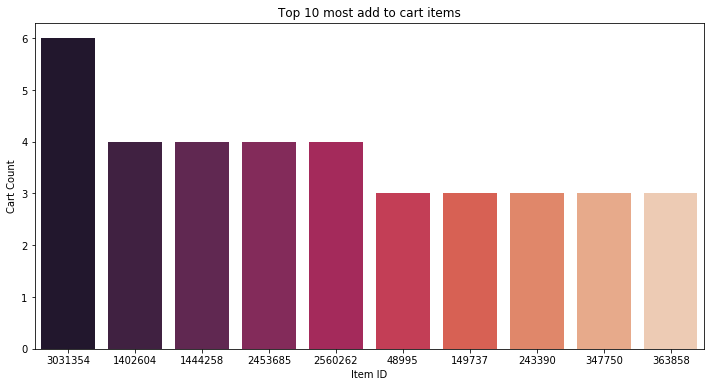

In [34]:
#sorting the dictionary
sort_add_cart = sorted(count_add_cart.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_cart = [i[0] for i in sort_add_cart[:10]]

# y-axis: Add to cart count
y_cart = [i[1] for i in sort_add_cart[:10]]

plt.figure(figsize=(12,6))
ax_cart = sns.barplot(x=x_cart, y=y_cart, order=x_cart, palette="rocket")
plt.title("Top 10 most add to cart items")
plt.xlabel("Item ID")
plt.ylabel("Cart Count")

In [0]:
#See the most favorite items
fav_items = grouped_behavior['fav']

#convert favorite items to numpy array
fav_items = np.array(fav_items[:])

#counting uniques values of favorite items
fav_unique, fav_counts = np.unique(fav_items, return_counts=True)

# Dictionary with key as unique and value as counts
count_fav_items = {}
count_fav_items = dict(zip(fav_unique, fav_counts))

Text(0, 0.5, 'Favorite Count')

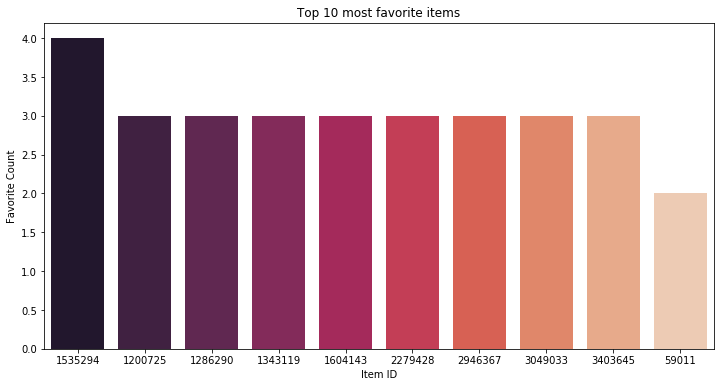

In [36]:
#sorting the dictionary
sort_fav_items = sorted(count_fav_items.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_fav = [i[0] for i in sort_fav_items[:10]]

# y-axis: Favorite count
y_fav = [i[1] for i in sort_fav_items[:10]]

plt.figure(figsize=(12,6))
ax_fav = sns.barplot(x=x_fav, y=y_fav, order=x_fav, palette="rocket")
plt.title("Top 10 most favorite items")
plt.xlabel("Item ID")
plt.ylabel("Favorite Count")

In [0]:
#See the most transacted items
buy_items = grouped_behavior['buy']

#convert bought items to numpy array
buy_items = np.array(buy_items[:])

#counting uniques values of bought items
buy_unique, buy_counts = np.unique(buy_items, return_counts=True)

# Dictionary with key as unique and value as counts
count_buy_items = {}
count_buy_items = dict(zip(buy_unique, buy_counts))

Text(0, 0.5, 'Transaction Count')

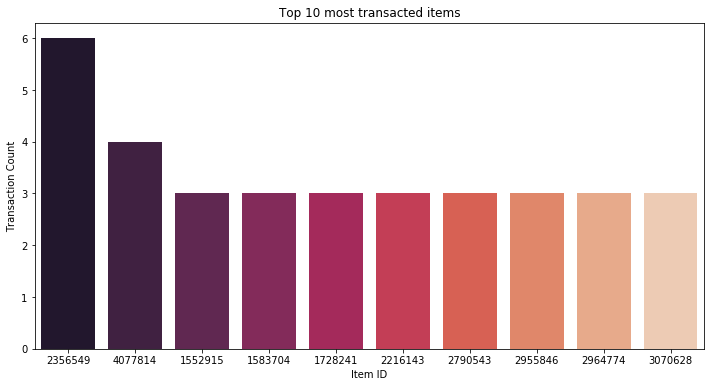

In [38]:
#sorting the dictionary
sort_buy_items = sorted(count_buy_items.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_buy = [i[0] for i in sort_buy_items[:10]]

# y-axis: Favorite count
y_buy = [i[1] for i in sort_buy_items[:10]]

plt.figure(figsize=(12,6))
ax_buy = sns.barplot(x=x_buy, y=y_buy, order=x_buy, palette="rocket")
plt.title("Top 10 most transacted items")
plt.xlabel("Item ID")
plt.ylabel("Transaction Count")

You will notice from the bar graphs that the top 10 most transacted items are very different from the top 10 most favourite, most viewed and most add to cart items.  This shows that more often than not, users may display interest in certain items, but end up not buying them.

In [0]:
#Group category_id by its user behavior
grouped_cat_behavior = tb_new.groupby('behavior_type')['category_id'].apply(list)
#grouped_cat_behavior

In [0]:
#See the most viewed categories
cat_pv = grouped_cat_behavior['pv']

#convert cat_pv to numpy array
cat_pv = np.array(cat_pv[:])

#counting uniques values of page views
pv_unique, pv_counts = np.unique(cat_pv, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_views = {}
count_cat_views = dict(zip(pv_unique, pv_counts))

Text(0, 0.5, 'View Count')

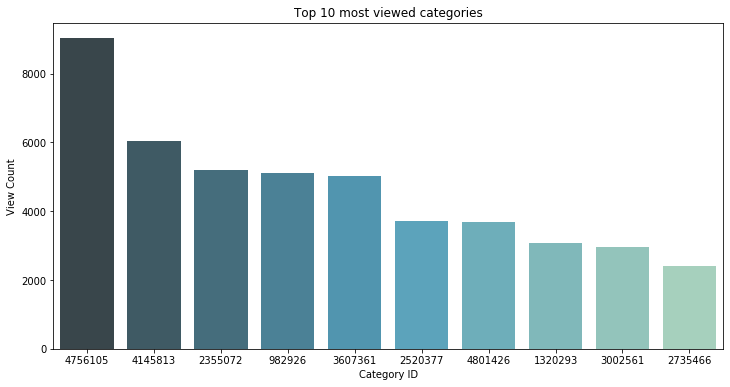

In [41]:
import operator
#sorting the dictionary
sort_cat_views = sorted(count_cat_views.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_pv = [i[0] for i in sort_cat_views[:10]]

# y-axis: count of views
y_pv = [i[1] for i in sort_cat_views[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_pv, y=y_pv, order=x_pv, palette="GnBu_d")
plt.title("Top 10 most viewed categories")
plt.xlabel("Category ID")
plt.ylabel("View Count")

In [0]:
#See the most add to cart categories
cat_cart = grouped_cat_behavior['cart']

#convert cat_cart to numpy array
cat_cart = np.array(cat_cart[:])

#counting uniques values of cart
cart_unique, cart_counts = np.unique(cat_cart, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_cart = {}
count_cat_cart = dict(zip(cart_unique, cart_counts))

Text(0, 0.5, 'Cart Count')

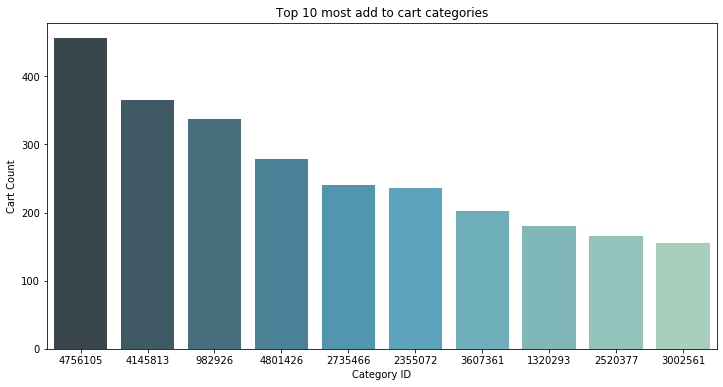

In [43]:
#sorting the dictionary
sort_cat_cart = sorted(count_cat_cart.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_cart = [i[0] for i in sort_cat_cart[:10]]

# y-axis: count of carts
y_cart = [i[1] for i in sort_cat_cart[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_cart, y=y_cart, order=x_cart, palette="GnBu_d")
plt.title("Top 10 most add to cart categories")
plt.xlabel("Category ID")
plt.ylabel("Cart Count")

In [0]:
#See the most favorite categories
cat_fav = grouped_cat_behavior['fav']

#convert cat_fav to numpy array
cat_fav = np.array(cat_fav[:])

#counting uniques values of fav
fav_unique, fav_counts = np.unique(cat_fav, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_fav = {}
count_cat_fav = dict(zip(fav_unique, fav_counts))

Text(0, 0.5, 'Favorite Count')

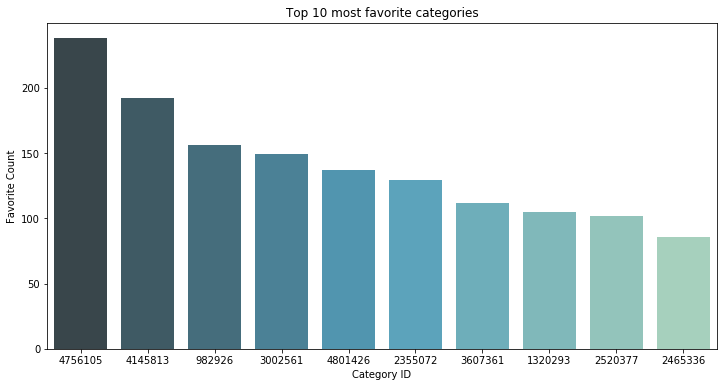

In [45]:
#sorting the dictionary
sort_cat_fav = sorted(count_cat_fav.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_fav = [i[0] for i in sort_cat_fav[:10]]

# y-axis: count of favorites
y_fav = [i[1] for i in sort_cat_fav[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_fav, y=y_fav, order=x_fav, palette="GnBu_d")
plt.title("Top 10 most favorite categories")
plt.xlabel("Category ID")
plt.ylabel("Favorite Count")

In [0]:
#See the most bought categories
cat_buy = grouped_cat_behavior['buy']

#convert cat_buy to numpy array
cat_buy = np.array(cat_buy[:])

#counting uniques values of fav
buy_unique, buy_counts = np.unique(cat_buy, return_counts=True)

# Dictionary with key as unique and value as counts
count_cat_buy = {}
count_cat_buy = dict(zip(buy_unique, buy_counts))

Text(0, 0.5, 'Transaction Count')

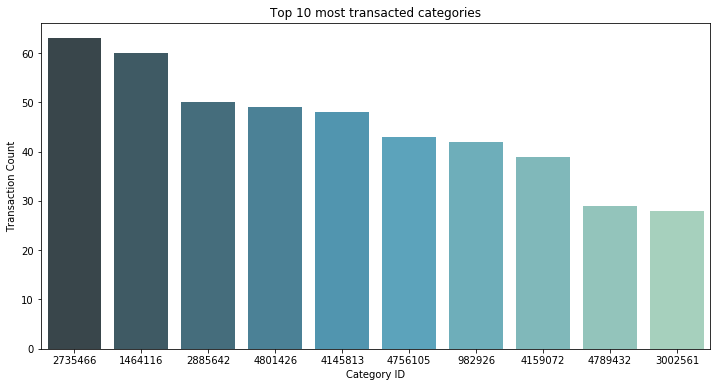

In [47]:
#sorting the dictionary
sort_cat_buy = sorted(count_cat_buy.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Category IDs
x_buy = [i[0] for i in sort_cat_buy[:10]]

# y-axis: count of transactions
y_buy = [i[1] for i in sort_cat_buy[:10]]

plt.figure(figsize=(12,6))
ax = sns.barplot(x=x_buy, y=y_buy, order=x_buy, palette="GnBu_d")
plt.title("Top 10 most transacted categories")
plt.xlabel("Category ID")
plt.ylabel("Transaction Count")

In [0]:
#Most active users
users = tb_new['user_id']

#convert users to numpy array
users = np.array(users[:])

#counting uniques values of userIDs
users_unique, users_counts = np.unique(users, return_counts=True)

# Dictionary with key as unique and value as counts
count_user_id = {}
count_user_id = dict(zip(users_unique, users_counts))

Text(0, 0.5, 'User Activity Count')

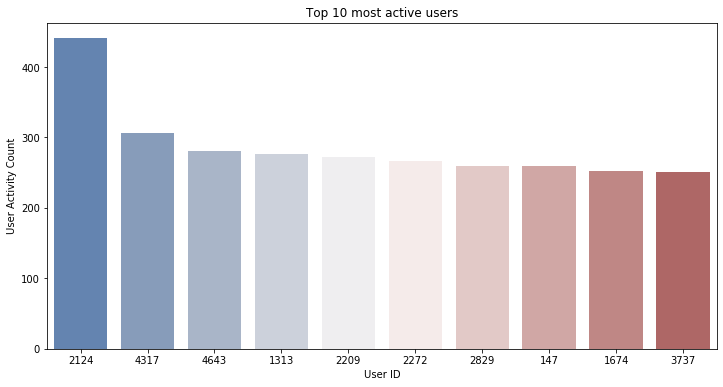

In [49]:
#sorting the dictionary
sort_users = sorted(count_user_id.items(), key = operator.itemgetter(1), reverse = True)

# x-axis: Item IDs
x_users = [i[0] for i in sort_users[:10]]

# y-axis: Favorite count
y_users = [i[1] for i in sort_users[:10]]

plt.figure(figsize=(12,6))
ax_users = sns.barplot(x=x_users, y=y_users, order=x_users, palette="vlag")
plt.title("Top 10 most active users")
plt.xlabel("User ID")
plt.ylabel("User Activity Count")

In [91]:
tb_new[tb_new['user_id']==2124].item_id.value_counts()

2977616    9
3155130    9
1368712    8
2371314    8
4371607    6
          ..
3198255    1
3162412    1
394025     1
4765546    1
4186094    1
Name: item_id, Length: 290, dtype: int64

It seems like the most active user is not subscribing to the top user behavioral trends i.e. popular item page views, favorites, add to cart and purchases.

In [50]:
#Number of users who actually bought something from taobao
user_purchased = tb_new[tb_new['behavior_type']=='buy'].user_id.unique()
user_purchased.size

1795

In [51]:
len(tb_new['user_id'].unique())

4826

Out of 4826 users, 1795 of them actually purchased an item or more on taobao.

In [0]:
#Dummy the column ('behavior_type')
tb_new = pd.get_dummies(tb_new, columns=['behavior_type'])

In [53]:
tb_new.head()

,user_id,item_id,category_id,timestamp,behavior_type_buy,behavior_type_cart,behavior_type_fav,behavior_type_pv
47,1,3219016,3002561,02/12/2017,0,0,0,1
50,1,4954999,411153,03/12/2017,0,0,0,1
51,1,818610,411153,03/12/2017,0,0,0,1
53,1,568695,1320293,03/12/2017,0,0,0,1
48,1,2278603,3002561,02/12/2017,0,0,0,1


In [54]:
tb_new.tail()

,user_id,item_id,category_id,timestamp,behavior_type_buy,behavior_type_cart,behavior_type_fav,behavior_type_pv
49149122,4999,884167,3790396,01/12/2017,0,0,0,1
49149120,4999,1922894,2188684,01/12/2017,0,0,0,1
49149125,4999,4138493,2188684,02/12/2017,0,0,0,1
49149123,4999,4138493,2188684,01/12/2017,0,0,0,1
49149124,4999,1922894,2188684,02/12/2017,0,0,0,1


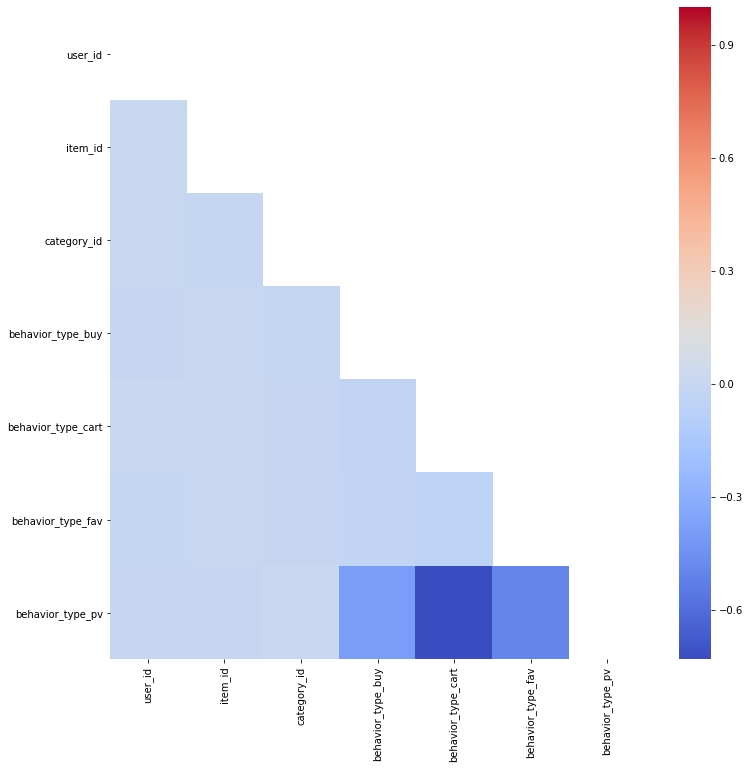

In [55]:
fix, ax = plt.subplots(figsize=(12,12))
corr = tb_new.corr()

# Generate a mask for the upper triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, cmap='coolwarm')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

From the heatmap, there is insignificant correlation between the variables. There is a negative correlation between user behavior:add to cart and user behavior: page view.

Conclusion:

For new vistors to the website, we do not have their user behavior information hence we will not be able to recommend products according to their liking. Instead, we could focus on recommending them popular products (as a baseline). Product popularity could be in terms of the top 10 most viewed items, top 10 most add to cart items, top 10 most transacted items and/or top 10 most favorite items. We can also recommend top 10 most viewed/add to cart/favorite/transacted item categories, depending on granularity of the recommendation.